<h1> Zadanie 1 </h1>

In [118]:
import skimage as ski
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
from skimage import io

<h1> Zadanie 1 a <h1>

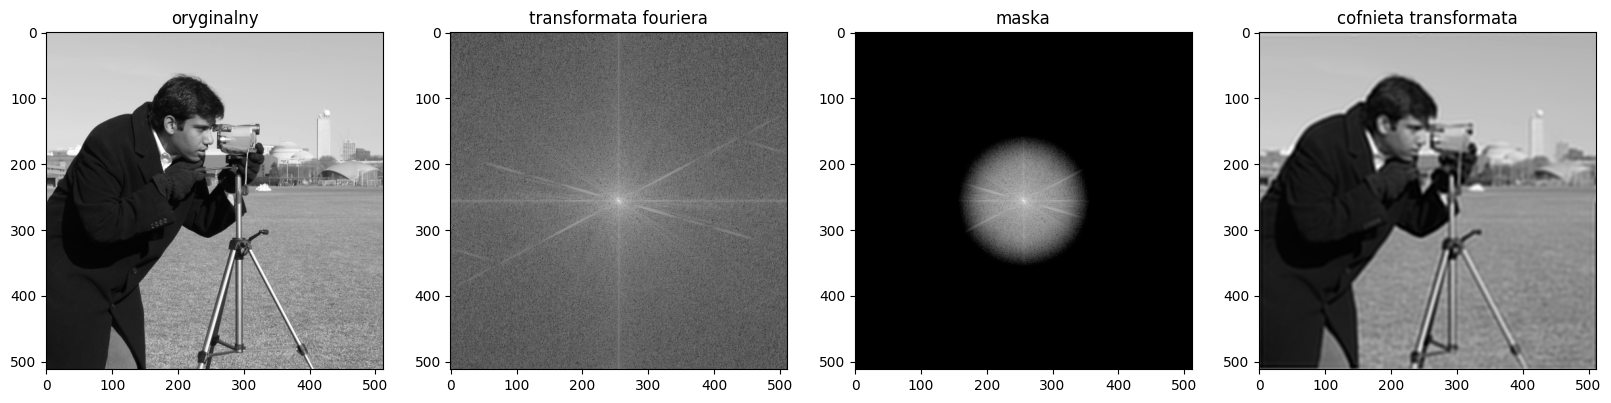

In [95]:
aparat = ski.data.camera().astype(float)
f_transform = np.fft.fft2(aparat)
shift = np.fft.fftshift(f_transform)

filter_strength = 60

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('oryginalny')
plt.imshow(aparat,cmap='gray')

plt.subplot(1,4,2)
plt.title('transformata fouriera')
plt.imshow(abs(np.log(shift)), cmap='gray')


plt.subplot(1,4,3)

rows, cols = shift.shape
center_row, center_col = rows // 2, cols // 2
radius = filter_strength
obraz2 = np.zeros_like(shift)
for i in range(rows):
    for j in range(cols):
        if (i - center_row)**2 + (j - center_col)**2 < radius**2:
            obraz2[i, j] = 1

smoothed_mask = gaussian_filter(obraz2, sigma=10)
filtered_shifted = shift * smoothed_mask


plt.title('maska')
plt.imshow(abs(np.log1p(filtered_shifted)), cmap='gray')


plt.subplot(1,4,4)
shifted2 = np.fft.ifftshift(filtered_shifted)
obraz_f = np.fft.ifft2(shifted2)
plt.title('cofnieta transformata')
plt.imshow(abs((obraz_f)),cmap='gray')
plt.show()








<h1> Zadanie 1B <h1>

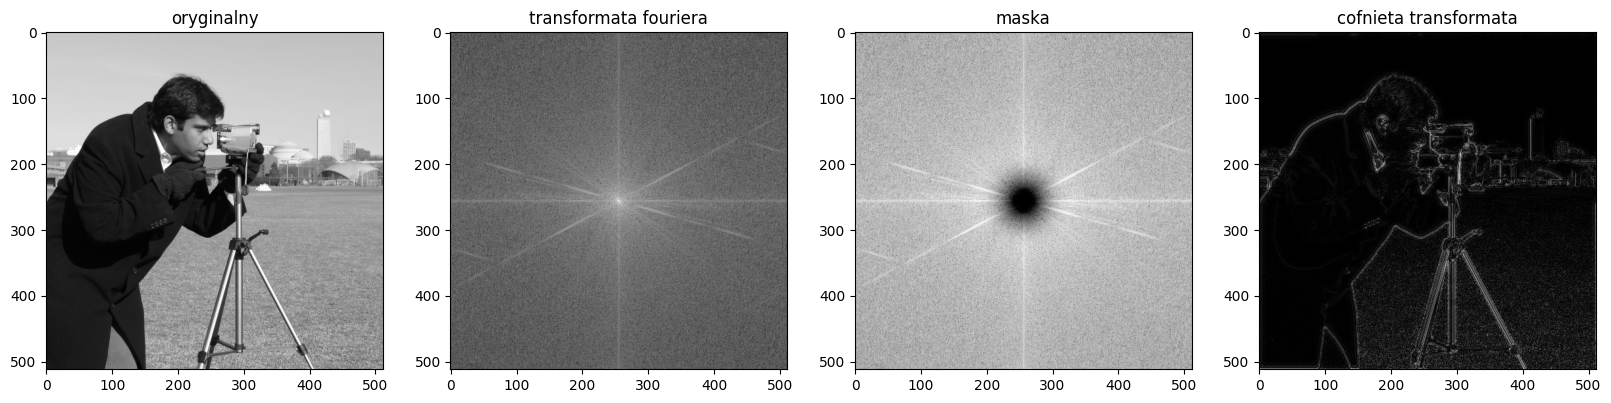

In [96]:
aparat = ski.data.camera().astype(float)
f_transform = np.fft.fft2(aparat)
shift = np.fft.fftshift(f_transform)

filter_strength = 60

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('oryginalny')
plt.imshow(aparat,cmap='gray')

plt.subplot(1,4,2)
plt.title('transformata fouriera')
plt.imshow(abs(np.log(shift)), cmap='gray')


plt.subplot(1,4,3)

rows, cols = shift.shape
center_row, center_col = rows // 2, cols // 2
radius = filter_strength
obraz2 = np.zeros_like(shift)
for i in range(rows):
    for j in range(cols):
        if not (i - center_row)**2 + (j - center_col)**2 < radius**2:
            obraz2[i, j] = 1

smoothed_mask = gaussian_filter(obraz2, sigma=10)
filtered_shifted = shift * smoothed_mask


plt.title('maska')
plt.imshow(abs(np.log1p(filtered_shifted)), cmap='gray')


plt.subplot(1,4,4)
shifted2 = np.fft.ifftshift(filtered_shifted)
obraz_f = np.fft.ifft2(shifted2)
plt.title('cofnieta transformata')
plt.imshow(abs((obraz_f)),cmap='gray')
plt.show()

<h1> Zadanie 1 C </h1>

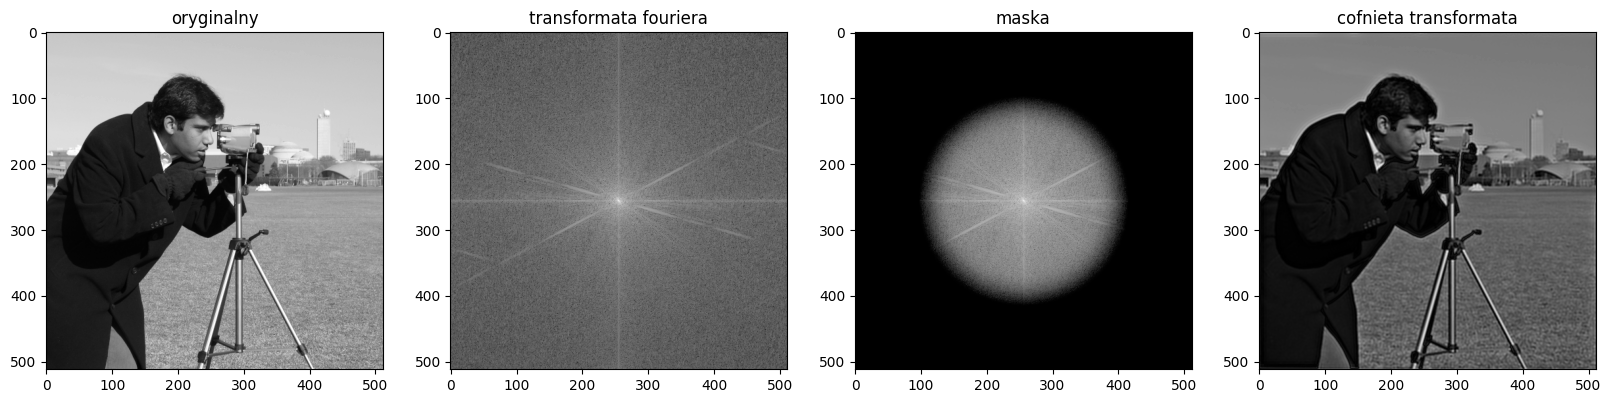

In [117]:
aparat = ski.data.camera().astype(float)
f_transform = np.fft.fft2(aparat)
shift = np.fft.fftshift(f_transform)

filter_strength = 60

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('oryginalny')
plt.imshow(aparat,cmap='gray')

plt.subplot(1,4,2)
plt.title('transformata fouriera')
plt.imshow(abs(np.log(shift)), cmap='gray')

plt.subplot(1,4,3)

rows, cols = shift.shape
center_row, center_col = rows // 2, cols // 2

low_f = 10
high_f = 120

x = np.arange(0, cols)
y = np.arange(0, rows)
X, Y = np.meshgrid(x, y)
distance_from_center = np.sqrt((X - center_col)**2 + (Y - center_row)**2)

bandpass_mask = np.logical_and(distance_from_center > low_f, distance_from_center < high_f).astype(float)

smoothed_mask = gaussian_filter(bandpass_mask, sigma=10)
filtered_shift = shift * smoothed_mask

plt.title('maska')
plt.imshow(abs(np.log1p(filtered_shift)), cmap='gray')


plt.subplot(1,4,4)
shifted2 = np.fft.ifftshift(filtered_shift)
obraz_f = np.fft.ifft2(shifted2)
plt.title('cofnieta transformata')
plt.imshow(abs((obraz_f)),cmap='gray')
plt.show()

<h1> Zadanie 2 </h1>

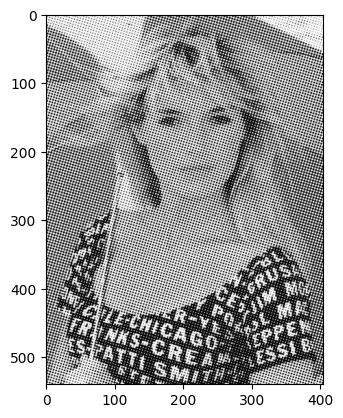

In [119]:
woman = io.imread('woman.jpg',as_gray=True)
plt.imshow(woman,cmap='gray')